In [1]:
#Loading the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the file
df = pd.read_csv('hepatitis_csv.csv')
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [3]:
df.shape

(155, 20)

In [4]:
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [7]:
#Data Cleaning
df.nunique()

age                49
sex                 2
steroid             2
antivirals          2
fatigue             2
malaise             2
anorexia            2
liver_big           2
liver_firm          2
spleen_palpable     2
spiders             2
ascites             2
varices             2
bilirubin          34
alk_phosphate      83
sgot               84
albumin            29
protime            44
histology           2
class               2
dtype: int64

In [8]:
df.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [9]:
#Finding the sum of all the null values in all the columns 
df.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [11]:
#We can see nunique shows 2 values of steriods and isnull is showing their is one null value so we have to fix that
df['steroid'].value_counts()

True     78
False    76
Name: steroid, dtype: int64

In [12]:
#Both true and false are almost equal so we can change the null value to anything as it won't cause any problem
df['steroid'].fillna(False,inplace = True)

In [13]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,False,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [14]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [16]:
#There are only 88 values of protime is present and 67 is missing so filling it randomy will cause problem in future
#I am gonning to drop it
df.drop("protime",inplace = True,axis = 1)

In [18]:
df["fatigue"].value_counts()

True     100
False     54
Name: fatigue, dtype: int64

In [19]:
df["fatigue"].fillna(True,inplace = True)

In [20]:
df["malaise"].value_counts()

False    93
True     61
Name: malaise, dtype: int64

In [21]:
#As majority of the value is False I am going to change that null to false
df["malaise"].fillna(False,inplace = True)

In [22]:
df.isnull().sum()

age                 0
sex                 0
steroid             0
antivirals          0
fatigue             0
malaise             0
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
histology           0
class               0
dtype: int64

In [23]:
df["anorexia"].value_counts()

False    122
True      32
Name: anorexia, dtype: int64

In [24]:
df["anorexia"].fillna(False,inplace = True)

In [25]:
df["liver_big"].value_counts()

True     120
False     25
Name: liver_big, dtype: int64

In [26]:
df["liver_big"].fillna(True,inplace = True)

In [27]:
df["liver_firm"].value_counts()

False    84
True     60
Name: liver_firm, dtype: int64

In [28]:
df["liver_firm"].fillna(False,inplace = True)

In [29]:
df["spleen_palpable"].value_counts()

False    120
True      30
Name: spleen_palpable, dtype: int64

In [30]:
df["spleen_palpable"].fillna(False,inplace = True)

In [31]:
df["spiders"].value_counts()

False    99
True     51
Name: spiders, dtype: int64

In [32]:
df["spiders"].fillna(False,inplace = True)

In [33]:
df["varices"].value_counts()

False    132
True      18
Name: varices, dtype: int64

In [34]:
df["varices"].fillna(False,inplace = True)

In [35]:
df["ascites"].value_counts()

False    130
True      20
Name: ascites, dtype: int64

In [36]:
df["ascites"].fillna(False,inplace = True)

In [37]:
df.isnull().sum()

age                 0
sex                 0
steroid             0
antivirals          0
fatigue             0
malaise             0
anorexia            0
liver_big           0
liver_firm          0
spleen_palpable     0
spiders             0
ascites             0
varices             0
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
histology           0
class               0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          155 non-null    bool   
 3   antivirals       155 non-null    bool   
 4   fatigue          155 non-null    bool   
 5   malaise          155 non-null    bool   
 6   anorexia         155 non-null    bool   
 7   liver_big        155 non-null    bool   
 8   liver_firm       155 non-null    bool   
 9   spleen_palpable  155 non-null    bool   
 10  spiders          155 non-null    bool   
 11  ascites          155 non-null    bool   
 12  varices          155 non-null    bool   
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  histology       

In [40]:
#I am gonna replace all the nuberical missing columns to the median
df = df.fillna(df.median())
df.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
histology          0
class              0
dtype: int64

In [41]:
#I have filled all the missing values in the dataset

In [42]:
#Distribution and relation

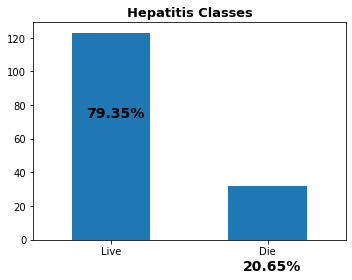

In [45]:
fig, ax = plt.subplots(figsize=(5,4))
name = ["Live", "Die"]
ax = df["class"].value_counts().plot(kind='bar')
ax.set_title("Hepatitis Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')
    
plt.tight_layout()

In [46]:
#Almost 80% patients live after getting infected with hepatitis

Text(0.5, 1.0, 'Age Distribution')

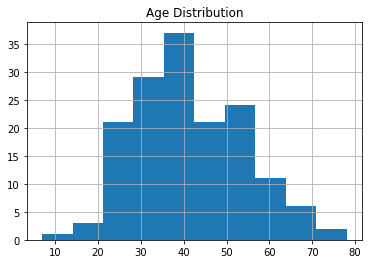

In [47]:
#Age variable distribution
df["age"].hist().plot(kind="bar")
plt.title("Age Distribution")

In [48]:
#The age is normally distributed

7
78
41.2


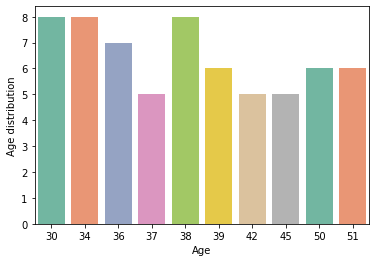

In [53]:
sns.barplot(x=df["age"].value_counts()[:10].index,
y=df["age"].value_counts()[:10].values,
palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')
print(min(df["age"]))
print(max(df["age"]))
print(df["age"].mean())

In [54]:
#The minimum age is 7
#The maximum age is 78
#The average age is around 41
#As we can see from the graph the patients are around their mid 30s

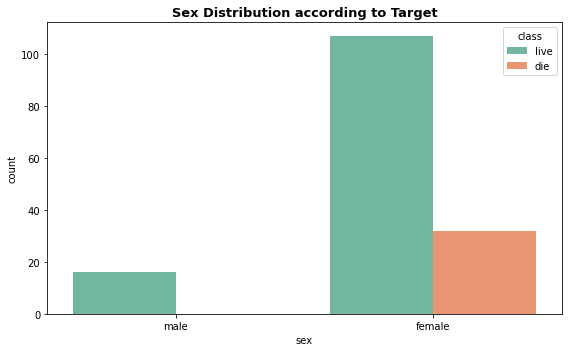

In [69]:
#Gender Distribution according to the class
fig, axis = plt.subplots(figsize=(8,5))
name = df['sex']
axis = sns.countplot(x='sex', hue='class', data=df, palette='Set2')
axis.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')


totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')
 
plt.tight_layout()

In [ ]:
#As from the graph all the male patient survive 

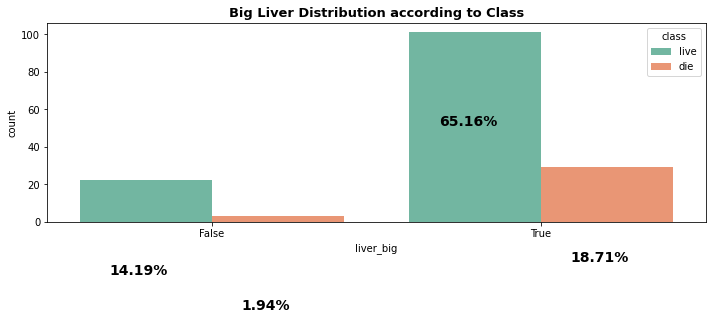

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['liver_big']
ax = sns.countplot(x='liver_big', hue='class', data=df, palette='Set2')
ax.set_title("Big Liver Distribution according to Class", fontsize = 13, weight = 'bold')


totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')

plt.tight_layout()

In [63]:
#It isn't necessary that you have hepatitis if you have big liver

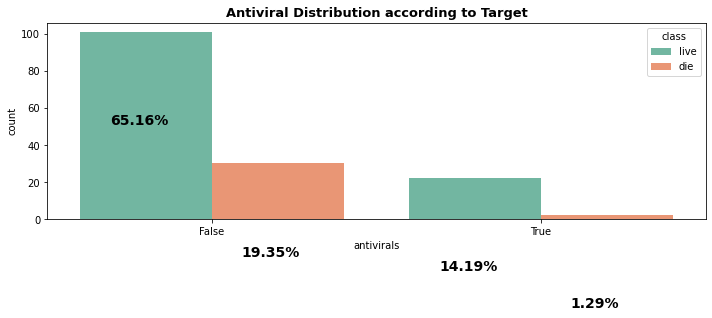

In [67]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['antivirals']
ax = sns.countplot(x='antivirals', hue='class', data=df, palette='Set2')
ax.set_title("Antiviral Distribution according to Target", fontsize = 13, weight = 'bold')


totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')
 
plt.tight_layout()

In [70]:
#Almost 65% patient didn't take any antiviraland they still live

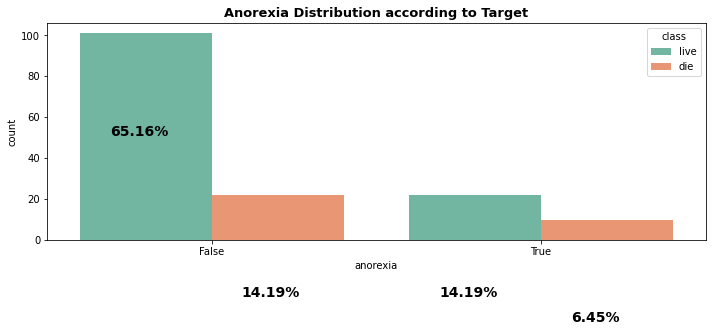

In [71]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['anorexia']
ax = sns.countplot(x='anorexia', hue='class', data=df, palette='Set2')
ax.set_title("Anorexia Distribution according to Target", fontsize = 13, weight = 'bold')


totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')
 
plt.tight_layout()

In [72]:
#Only 20% people experience anorexia 

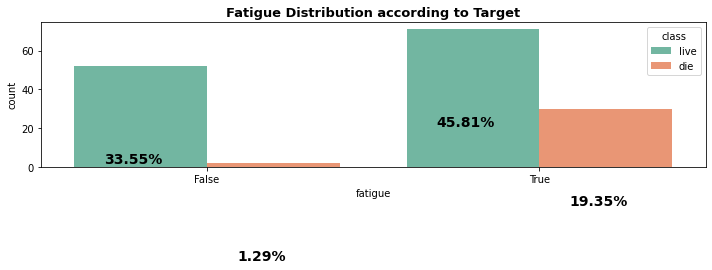

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['fatigue']
ax = sns.countplot(x='fatigue', hue='class', data=df, palette='Set2')
ax.set_title("Fatigue Distribution according to Target", fontsize = 13, weight = 'bold')


totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')
 
plt.tight_layout()

In [74]:
#Almost 66% people experience fatigue

Text(0.5, 1.0, 'Bilirubin Distribution')

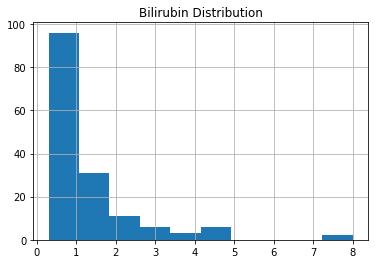

In [75]:
df["bilirubin"].hist().plot(kind="bar")
plt.title("Bilirubin Distribution")

In [76]:
#Bilirubin is left skewed

Text(0.5, 1.0, 'alk_phosphate Distribution')

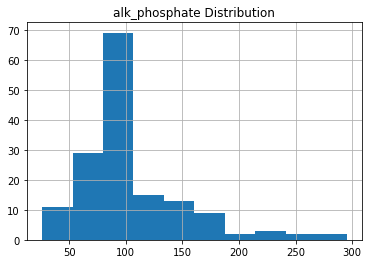

In [77]:
df["alk_phosphate"].hist().plot(kind="bar")
plt.title("alk_phosphate Distribution")

In [78]:
#alk_phosphate is left skewed

Text(0.5, 1.0, 'albumin Distribution')

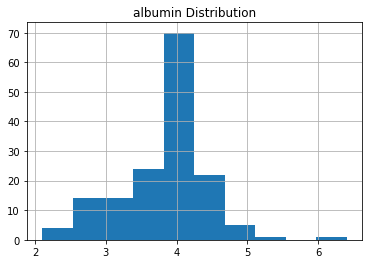

In [79]:
df["albumin"].hist().plot(kind="bar")
plt.title("albumin Distribution")

In [80]:
#albumin is normally distributed

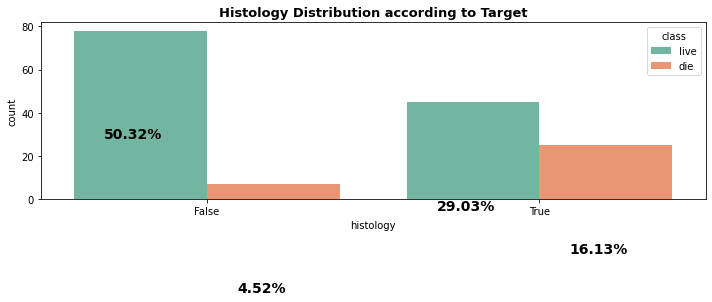

In [81]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['histology']
ax = sns.countplot(x='histology', hue='class', data=df, palette='Set2')
ax.set_title("Histology Distribution according to Target", fontsize = 13, weight = 'bold')


totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')
 
plt.tight_layout()

In [82]:
#Almost 45% patients have past history

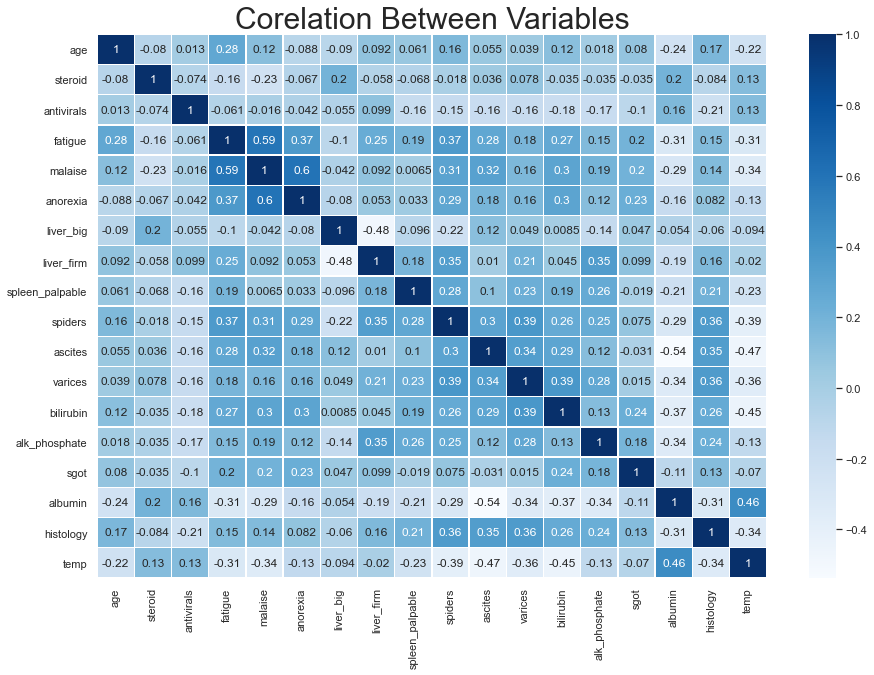

In [85]:
df["temp"] = df["class"].replace({"live":1,"die":0})
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

In [86]:
#Albium, bilirubin, ascities, malasies shows negative correction with the target